<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:35px; font-family:Andale Mono,monospace;">Assignmet 08</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Training model used in this assignment are </font>
    <ul style="font-size:20px; font-family:Andale Mono,monospace;">
        <li>Decision Tree</li>
        <li>Random Forest</li>
        <li>K-Nearest Neighbors Classifier</li>
        <li>Support Vector Classifier</li>
        <li>Voting</li>
    </ul>
    <font style="font-size:20px; font-family:Andale Mono,monospace; color:red; font-weight:bold;">Note that I decided to hide the testing point on 'Plot_decisions_regions', because the graph looks super ugly if I doesn't hide the testing point</font>
</div>

In [1]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.7.3
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.17.1
import numpy as np

# pandas  0.25.1
import pandas as pd

# scikit-learn  0.21.3
from sklearn import datasets
load_iris = datasets.load_iris
make_moons = datasets.make_moons
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# matplotlib  3.1.1
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
from lib import *

In [2]:
! pip install pyplot

  ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Load training datasets </font>
</div>

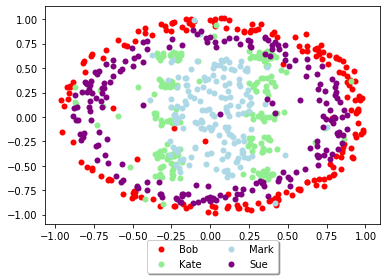

In [2]:
file = open('./train.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X_train = np.ndarray((0, 2))
y_train = np.ndarray((0,))
y_train_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
  i += 1
  X_train = np.vstack((X_train, np.array(row[0:2])))
  y_train = np.append(y_train, y_train_mapping[row[2]])
X_train = X_train.astype(np.float)
y_train = y_train.astype(np.float)
file.close()

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Bob', c='red', linewidths=0)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Kate', c='lightgreen', linewidths=0)
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], label='Mark', c='lightblue', linewidths=0)
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], label='Sue', c='purple', linewidths=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Load testing datasets </font>
</div>

In [3]:
file = open('./test.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X_test = np.ndarray((0, 2))
y_test = np.ndarray((0,))
y_test_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
  i += 1
  X_test = np.vstack((X_test, np.array(row[0:2])))
  y_test = np.append(y_test, y_test_mapping[row[2]])
X_test = X_test.astype(np.float)
y_test = y_test.astype(np.float)
file.close()

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Plot Regions Function </font>
</div>

In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, soft=False):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    y_train_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    x2_min, x2_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if soft:
        Z = classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:, 0]
        Z = Z.reshape(xx1.shape)
        contour = plt.contourf(xx1, xx2, Z, alpha=0.4)
        plt.colorbar(contour)
    else:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha = 0.8,
            c = [cmap(idx)],  # Prevents warning
            linewidths = 1,
            marker = markers[idx],
            label = list(y_train_mapping.keys())[list(y_train_mapping.values()).index(cl)],
            edgecolors = 'k'
        )

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, 
                    label='test set')

In [5]:
def Plot_Result(model, title, X_train, X_test):
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    plot_decision_regions(X=X_combined, y=y_combined, 
                          classifier=model,
                          test_idx=range(len(y_train), 
                                         len(y_train) + len(y_test)))
    plt.title(title)
    plt.tight_layout()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
    plt.show()

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Decision Tree</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">1. Just with Decision Tree Only</font>
</div>

In [6]:
depth = [1, 10, 100, 200]
best_depth = -1
best_acc = -1
best_dt = -1

for d in depth:
    Dtree = DecisionTreeClassifier(criterion='entropy', 
                                         max_depth=d, 
                                         random_state=0)
    Dtree.fit(X_train, y_train)

    y_pred = Dtree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy (' + str(d) + '-Depth Decision Tree): %.2f' % acc)
    
    if acc > best_acc:
        best_depth, best_acc, best_dt = d, acc, Dtree

Accuracy (1-Depth Decision Tree): 0.29
Accuracy (10-Depth Decision Tree): 0.76
Accuracy (100-Depth Decision Tree): 0.80
Accuracy (200-Depth Decision Tree): 0.80


best depth: 100


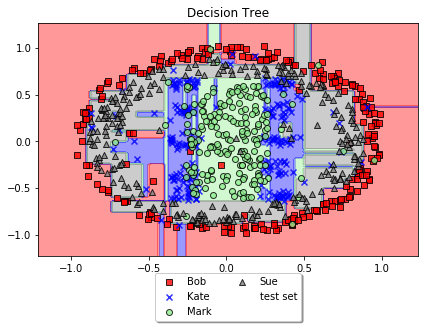

In [7]:
print("best depth: " + str(best_depth))
Plot_Result(best_dt, 'Decision Tree', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">2. K Fold Cross Validation</font>
</div>

In [8]:
best_k, best_score = -1, -1
clfs = {}

for k in [5, 10, 15, 50, 100]: # experiment different hyperparameter
    Dtree = DecisionTreeClassifier(criterion='entropy', 
                                         max_depth=best_depth, 
                                         random_state=0)
    Dtree.fit(X_train, y_train)
    # K-Fold CV
    scores = cross_val_score(Dtree, X_train, y_train, cv=k)
    print('[%d CV]\nValidation accuracy: %.3f' % (k, scores.mean()))
    if scores.mean() > best_score:
        best_k, best_score = k, scores.mean()
    clfs[k] = Dtree

[5 CV]
Validation accuracy: 0.768
[10 CV]
Validation accuracy: 0.774
[15 CV]
Validation accuracy: 0.791
[50 CV]
Validation accuracy: 0.778
[100 CV]
Validation accuracy: 0.779


In [9]:
best_clf = clfs[best_k]
best_clf.fit(X_train, y_train)

# performance reporting
y_pred = best_clf.predict(X_test)
print('Test accuracy: %.2f (by %d-fold CV)' % 
      (accuracy_score(y_test, y_pred), best_k))

Test accuracy: 0.80 (by 15-fold CV)


Best k :15


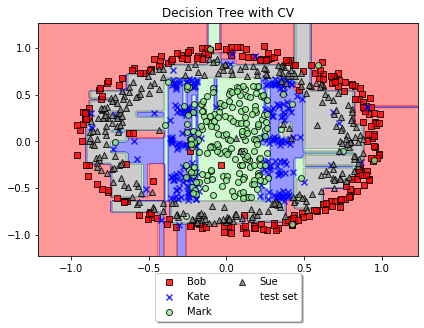

In [10]:
print("Best k :" + str(best_k))
Plot_Result(best_clf, 'Decision Tree with CV', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">3. Bagging</font>
</div>

In [11]:
BagDepth = [1, 100, 200, 500]
best_acc = -1
best_bg = -1
best_depth_Bag = -1

for d in BagDepth:
    Dtree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    bag = BaggingClassifier(base_estimator=Dtree, n_estimators=500, 
                            max_samples=0.7, bootstrap=True,
                            max_features=1.0, bootstrap_features=False, 
                            n_jobs=1, random_state=1)
    # Bagging
    bag = bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)

    bag_test = accuracy_score(y_test, y_pred) 
    print('[Bagging with %d-Depth Decision Tree] Accuracy = %.2f' % (d, bag_test))
    
    if bag_test > best_acc:
        best_depth_Bag, best_acc, best_bg = d, bag_test, bag

[Bagging with 1-Depth Decision Tree] Accuracy = 0.29
[Bagging with 100-Depth Decision Tree] Accuracy = 0.81
[Bagging with 200-Depth Decision Tree] Accuracy = 0.81
[Bagging with 500-Depth Decision Tree] Accuracy = 0.81


best depth : 100


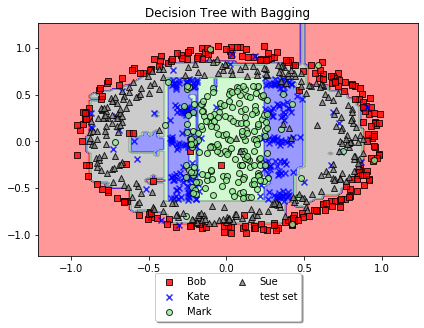

In [12]:
print("best depth : " + str(best_depth_Bag))
Plot_Result(best_bg, 'Decision Tree with Bagging', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">4. Boosting</font>
</div>

In [13]:
best_acc = -1
best_bst = -1
best_depth_Bst = -1

BstDepth = [1, 100, 200, 500, 1000]
for d in BstDepth:
    Dtree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    # adaboost
    ada = AdaBoostClassifier(base_estimator=Dtree, n_estimators=500)
    ada = ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    ada_test = accuracy_score(y_test, y_pred)
    print('[AdaBoost with %d-Depth Decision Tree] Accuracy = %.2f' % (d, ada_test))
    
    if ada_test > best_acc:
        best_depth_Bst, best_acc, best_bst = d, ada_test, ada

[AdaBoost with 1-Depth Decision Tree] Accuracy = 0.53
[AdaBoost with 100-Depth Decision Tree] Accuracy = 0.76
[AdaBoost with 200-Depth Decision Tree] Accuracy = 0.77
[AdaBoost with 500-Depth Decision Tree] Accuracy = 0.79
[AdaBoost with 1000-Depth Decision Tree] Accuracy = 0.78


best depth : 500


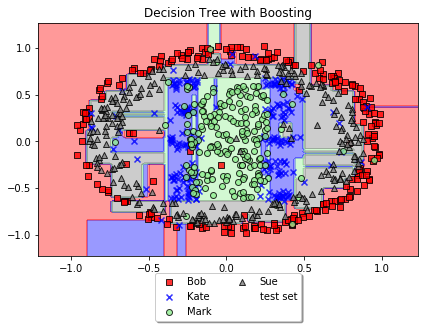

In [14]:
print("best depth : " + str(best_depth_Bst))
Plot_Result(best_bst, 'Decision Tree with Boosting', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">5. Pipeline</font>
</div>

In [15]:
best_acc = -1
best_pipe = -1
best_depth_pipe = -1

PipeDepth = [1, 100, 200, 500, 1000]

for d in PipeDepth:
    pipe_DTree = Pipeline([['clf', DecisionTreeClassifier(max_depth = d, random_state = 0)]])
    pipe_DTree.fit(X_train, y_train)
    y_pred = pipe_DTree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print('[%d depth Decision Tree with Pipeline]' %d)
    print('Accuracy: %.4f' % acc)
    
    if acc > best_acc:
        best_depth_pipe, best_acc, best_pipe = d, acc, pipe_DTree
    

[1 depth Decision Tree with Pipeline]
Accuracy: 0.2919
[100 depth Decision Tree with Pipeline]
Accuracy: 0.7838
[200 depth Decision Tree with Pipeline]
Accuracy: 0.7838
[500 depth Decision Tree with Pipeline]
Accuracy: 0.7838
[1000 depth Decision Tree with Pipeline]
Accuracy: 0.7838


best depth : 100


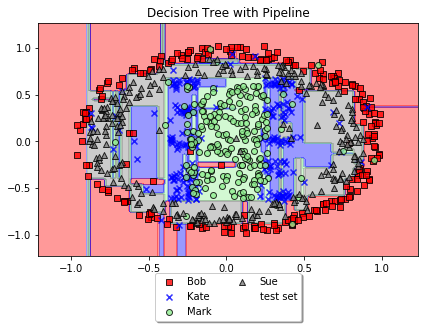

In [16]:
print("best depth : " + str(best_depth_pipe))
Plot_Result(best_pipe, 'Decision Tree with Pipeline', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Random Forest</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">1. Just with Random Forest Only</font>
</div>

In [17]:
best_trees = -1
best_rf = -1
best_acc = -1

trees = [10, 50, 100, 200, 1000]
for t in trees:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=t, 
                                    random_state=1,
                                    n_jobs=2)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy (Random Forest with trees-%d): %.2f' % (t, acc))
    
    if acc > best_acc:
        best_trees, best_acc, best_rf = t, acc, forest

Accuracy (Random Forest with trees-10): 0.80
Accuracy (Random Forest with trees-50): 0.82
Accuracy (Random Forest with trees-100): 0.80
Accuracy (Random Forest with trees-200): 0.81
Accuracy (Random Forest with trees-1000): 0.80


Best number of trees : 50


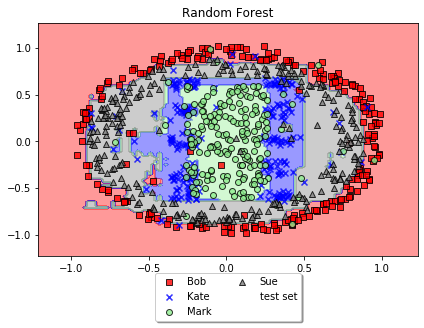

In [18]:
print("Best number of trees : " + str(best_trees))
Plot_Result(best_rf, 'Random Forest', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">2. K Fold Cross Validation</font>
</div>

In [19]:
best_k, best_score = -1, -1
clfs = {}

for k in [5, 10, 15, 50, 100]: # experiment different hyperparameter
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=best_trees, 
                                    random_state=1,
                                    n_jobs=2)
    forest.fit(X_train, y_train)
    # K-Fold CV
    scores = cross_val_score(forest, X_train, y_train, cv=k)
    print('[%d CV]\nValidation accuracy: %.4f' % (k, scores.mean()))
    
    if scores.mean() > best_score:
        best_k, best_score = k, scores.mean()
    clfs[k] = forest

[5 CV]
Validation accuracy: 0.8320
[10 CV]
Validation accuracy: 0.8278
[15 CV]
Validation accuracy: 0.8308
[50 CV]
Validation accuracy: 0.8334
[100 CV]
Validation accuracy: 0.8333


In [20]:
best_clf = clfs[best_k]
best_clf.fit(X_train, y_train)

# performance reporting
y_pred = best_clf.predict(X_test)
print('Test accuracy: %.2f (by %d-fold CV)' % 
      (accuracy_score(y_test, y_pred), best_k))

Test accuracy: 0.82 (by 50-fold CV)


Best k :50


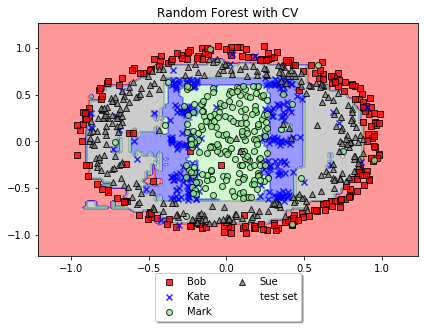

In [21]:
print("Best k :" + str(best_k))
Plot_Result(best_clf, 'Random Forest with CV', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">3. Bagging</font>
</div>

In [22]:
BagTrees = [10, 50, 100]
best_acc = -1
best_bg = -1
best_trees_Bag = -1

for t in BagTrees:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=t, 
                                    random_state=1,
                                    n_jobs=2)
    bag = BaggingClassifier(base_estimator=forest, n_estimators=500, 
                            max_samples=0.7, bootstrap=True,
                            max_features=1.0, bootstrap_features=False, 
                            n_jobs=1, random_state=1)
    # Bagging
    bag = bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)

    bag_test = accuracy_score(y_test, y_pred) 
    print('[Bagging with %d-Estimators Random Forest] Accuracy = %.2f' % (t, bag_test))
    
    if bag_test > best_acc:
        best_trees_Bag, best_acc, best_bg = t, bag_test, bag

[Bagging with 10-Estimators Random Forest] Accuracy = 0.81
[Bagging with 50-Estimators Random Forest] Accuracy = 0.81
[Bagging with 100-Estimators Random Forest] Accuracy = 0.81


Best number of trees : 10


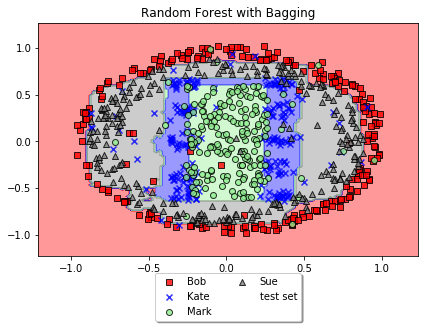

In [23]:
print("Best number of trees : " + str(best_trees_Bag))
Plot_Result(best_bg, 'Random Forest with Bagging', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">4. Boosting</font>
</div>

In [24]:
best_acc = -1
best_bst = -1
best_trees_Bst = -1

BstTrees = [10, 50, 100]
for t in BstTrees:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=t, 
                                    random_state=1,
                                    n_jobs=2)
    # adaboost
    ada = AdaBoostClassifier(base_estimator=forest, n_estimators=500)
    ada = ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    ada_test = accuracy_score(y_test, y_pred)
    print('[AdaBoost with %d-Estimators Random Forest] Accuracy = %.2f' % (t, ada_test))
    
    if ada_test > best_acc:
        best_trees_Bst, best_acc, best_bst = t, ada_test, ada

[AdaBoost with 10-Estimators Random Forest] Accuracy = 0.79
[AdaBoost with 50-Estimators Random Forest] Accuracy = 0.82
[AdaBoost with 100-Estimators Random Forest] Accuracy = 0.81


Best number of trees : 50


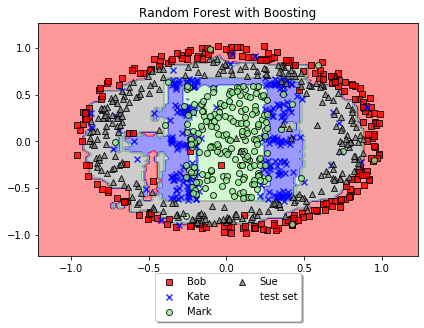

In [25]:
print("Best number of trees : " + str(best_trees_Bst))
Plot_Result(best_bst, 'Random Forest with Boosting', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">5. Pipeline</font>
</div>

In [26]:
best_acc = -1
best_pipe = -1
best_trees_pipe = -1

PipeTrees = [10, 50, 100, 500]

for t in PipeTrees:
    pipe_Forest = Pipeline([['clf', RandomForestClassifier(criterion='entropy',
                                    n_estimators=t, 
                                    random_state=1,
                                    n_jobs=2)]])
    
    pipe_Forest.fit(X_train, y_train)
    y_pred = pipe_Forest.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print('[%d estimators Random Forest with Pipeline]' %t)
    print('Accuracy: %.4f' % acc)
    
    if acc > best_acc:
        best_trees_pipe, best_acc, best_pipe = t, acc, pipe_Forest
    

[10 estimators Random Forest with Pipeline]
Accuracy: 0.8000
[50 estimators Random Forest with Pipeline]
Accuracy: 0.8162
[100 estimators Random Forest with Pipeline]
Accuracy: 0.8000
[500 estimators Random Forest with Pipeline]
Accuracy: 0.7946


best trees : 50


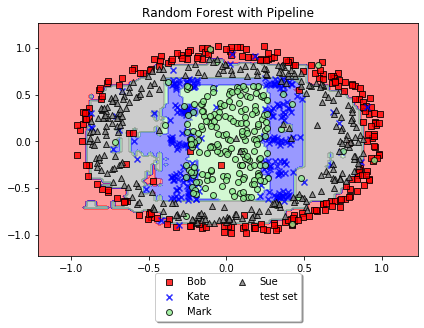

In [27]:
print("best trees : " + str(best_trees_pipe))
Plot_Result(best_pipe, 'Random Forest with Pipeline', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">K-Nearest Neighbors Classifier</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">1. Just with KNN Only</font>
</div>

In [28]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

best_ng = -1
best_acc = -1
best_knn = -1

neighbors = [1, 11, 15, 20, 50, 100]
# p=2 and metric='minkowski' means the Euclidean Distance
for ng in neighbors:
    knn = KNeighborsClassifier(n_neighbors=ng, p=2, metric='minkowski')

    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    
    print('[KNN with %d neighbors]' %ng)
    print('Accuracy: %.2f' % acc)
    
    if acc > best_acc:
        best_ng, best_acc, best_knn = ng, acc, knn

[KNN with 1 neighbors]
Accuracy: 0.81
[KNN with 11 neighbors]
Accuracy: 0.75
[KNN with 15 neighbors]
Accuracy: 0.73
[KNN with 20 neighbors]
Accuracy: 0.70
[KNN with 50 neighbors]
Accuracy: 0.63
[KNN with 100 neighbors]
Accuracy: 0.60


Best number of neighbors : 1


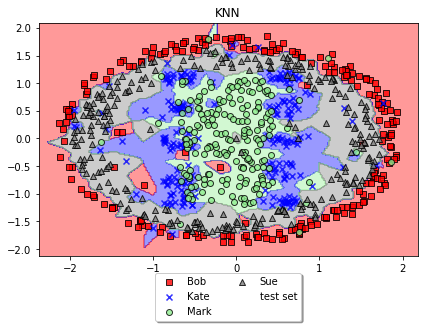

In [29]:
print("Best number of neighbors : " + str(best_ng))
Plot_Result(best_knn, 'KNN', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">2. K Fold Cross Validation</font>
</div>

In [30]:
best_k, best_score = -1, -1
clfs = {}

for k in [5, 10, 15, 50, 100]: # experiment different hyperparameter
    knn = KNeighborsClassifier(n_neighbors=best_ng, p=2, metric='minkowski')
    
    knn.fit(X_train_std, y_train)
    # K-Fold CV
    scores = cross_val_score(knn, X_train_std, y_train, cv=k)
    print('[%d CV]\nValidation accuracy: %.4f' % (k, scores.mean()))
    
    if scores.mean() > best_score:
        best_k, best_score = k, scores.mean()
    clfs[k] = knn

[5 CV]
Validation accuracy: 0.8076
[10 CV]
Validation accuracy: 0.8144
[15 CV]
Validation accuracy: 0.8121
[50 CV]
Validation accuracy: 0.8134
[100 CV]
Validation accuracy: 0.8134


In [31]:
best_clf = clfs[best_k]
best_clf.fit(X_train_std, y_train)

# performance reporting
y_pred = best_clf.predict(X_test_std)
print('Test accuracy: %.2f (by %d-fold CV)' % 
      (accuracy_score(y_test, y_pred), best_k))

Test accuracy: 0.81 (by 10-fold CV)


Best k :10


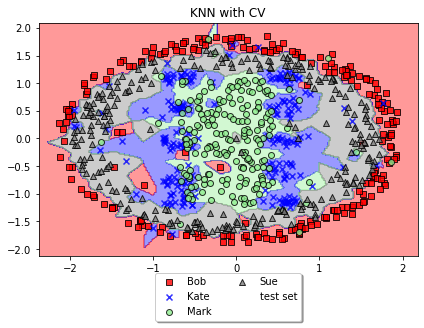

In [32]:
print("Best k :" + str(best_k))
Plot_Result(best_clf, 'KNN with CV', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">3. Bagging</font>
</div>

In [33]:
BagNeighbors = [1, 11, 15, 20, 50, 100]
best_acc = -1
best_bg = -1
best_ng_Bag = -1

for ng in BagNeighbors:
    knn = KNeighborsClassifier(n_neighbors=ng, p=2, metric='minkowski')
    
    bag = BaggingClassifier(base_estimator=knn, n_estimators=500, 
                            max_samples=0.7, bootstrap=True,
                            max_features=1.0, bootstrap_features=False, 
                            n_jobs=1, random_state=1)
    # Bagging
    bag = bag.fit(X_train_std, y_train)
    y_pred = bag.predict(X_test_std)

    bag_test = accuracy_score(y_test, y_pred) 
    print('[Bagging with KNN(%d estimators)] Accuracy = %.2f' % (ng, bag_test))
    
    if bag_test > best_acc:
        best_ng_Bag, best_acc, best_bg = ng, bag_test, bag

[Bagging with KNN(1 estimators)] Accuracy = 0.79
[Bagging with KNN(11 estimators)] Accuracy = 0.75
[Bagging with KNN(15 estimators)] Accuracy = 0.72
[Bagging with KNN(20 estimators)] Accuracy = 0.69
[Bagging with KNN(50 estimators)] Accuracy = 0.64
[Bagging with KNN(100 estimators)] Accuracy = 0.50


Best number of neighbors : 1


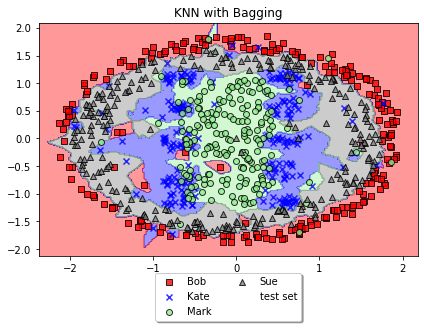

In [34]:
print("Best number of neighbors : " + str(best_ng_Bag))
Plot_Result(best_bg, 'KNN with Bagging', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">4. Pipeline</font>
</div>

In [35]:
best_acc = -1
best_pipe = -1
best_ng_pipe = -1

PipeNeighbors = [1, 11, 15, 20, 50, 100]

for ng in PipeNeighbors:
    pipe_KNN = Pipeline([ ('scl', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors=ng, p=2, metric='minkowski'))])
    
    pipe_KNN.fit(X_train_std, y_train)
    y_pred = pipe_KNN.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    
    print('[%d estimators KNN with Pipeline]' %ng)
    print('Accuracy: %.4f' % acc)
    
    if acc > best_acc:
        best_ng_pipe, best_acc, best_pipe = ng, acc, pipe_KNN
        

[1 estimators KNN with Pipeline]
Accuracy: 0.8054
[11 estimators KNN with Pipeline]
Accuracy: 0.7514
[15 estimators KNN with Pipeline]
Accuracy: 0.7297
[20 estimators KNN with Pipeline]
Accuracy: 0.7027
[50 estimators KNN with Pipeline]
Accuracy: 0.6324
[100 estimators KNN with Pipeline]
Accuracy: 0.6000


Best number of neighbors : 1


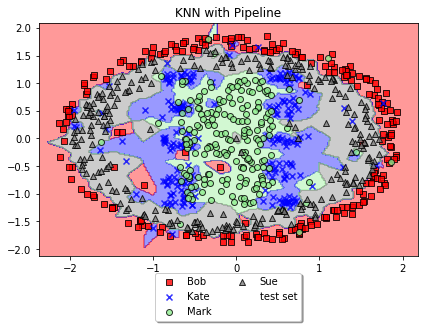

In [36]:
print("Best number of neighbors : " + str(best_ng_pipe))
Plot_Result(best_pipe, 'KNN with Pipeline', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Support Vector Classifier</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">1. Just with SVC Only</font>
</div>

In [37]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

best_C = -1
best_acc = -1
best_svc = -1

Cparam = [10, 20, 50, 100, 200, 1000, 10000]

for cp in Cparam:
    # C is the hyperparameter for the error penalty term
    # gamma is the hyperparameter for the rbf kernel
    svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=cp)

    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    
    print('[Nonlinear SVC with %d c parameters]' %cp)
    print('Accuracy: %.2f' % acc)
    
    if acc > best_acc:
        best_C, best_acc, best_svc = cp, acc, svm
    

[Nonlinear SVC with 10 c parameters]
Accuracy: 0.83
[Nonlinear SVC with 20 c parameters]
Accuracy: 0.84
[Nonlinear SVC with 50 c parameters]
Accuracy: 0.83
[Nonlinear SVC with 100 c parameters]
Accuracy: 0.83
[Nonlinear SVC with 200 c parameters]
Accuracy: 0.82
[Nonlinear SVC with 1000 c parameters]
Accuracy: 0.83
[Nonlinear SVC with 10000 c parameters]
Accuracy: 0.81


Best C parameters : 20


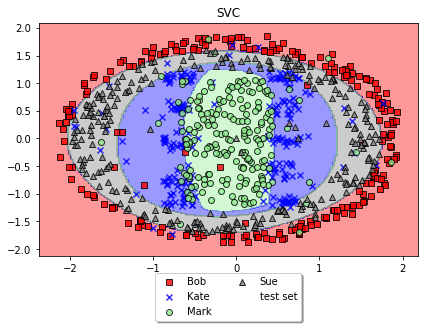

In [38]:
print("Best C parameters : " + str(best_C))
Plot_Result(best_svc, 'SVC', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">2. K Fold Cross Validation</font>
</div>

In [39]:
best_k, best_score = -1, -1
clfs = {}

for k in [5, 10, 15, 50, 100]: # experiment different hyperparameter
    # C is the hyperparameter for the error penalty term
    # gamma is the hyperparameter for the rbf kernel
    svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=best_C)
    
    svm.fit(X_train_std, y_train)
    # K-Fold CV
    scores = cross_val_score(svm, X_train_std, y_train, cv=k)
    print('[%d CV]\nValidation accuracy: %.4f' % (k, scores.mean()))
    
    if scores.mean() > best_score:
        best_k, best_score = k, scores.mean()
    clfs[k] = svm

[5 CV]
Validation accuracy: 0.8550
[10 CV]
Validation accuracy: 0.8536
[15 CV]
Validation accuracy: 0.8511
[50 CV]
Validation accuracy: 0.8594
[100 CV]
Validation accuracy: 0.8468


In [40]:
best_clf = clfs[best_k]
best_clf.fit(X_train_std, y_train)

# performance reporting
y_pred = best_clf.predict(X_test_std)
print('Test accuracy: %.2f (by %d-fold CV)' % 
      (accuracy_score(y_test, y_pred), best_k))

Test accuracy: 0.84 (by 50-fold CV)


Best k :50


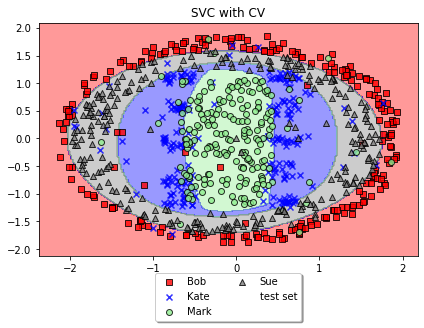

In [41]:
print("Best k :" + str(best_k))
Plot_Result(best_clf, 'SVC with CV', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">3. Bagging</font>
</div>

In [42]:
BagCparams = [10, 20, 50, 100, 200, 1000, 10000]
best_acc = -1
best_bg = -1
best_C_Bag = -1

for cp in BagCparams:
    # C is the hyperparameter for the error penalty term
    # gamma is the hyperparameter for the rbf kernel
    svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=cp)
    
    bag = BaggingClassifier(base_estimator=svm, n_estimators=500, 
                            max_samples=0.7, bootstrap=True,
                            max_features=1.0, bootstrap_features=False, 
                            n_jobs=1, random_state=1)
    # Bagging
    bag = bag.fit(X_train_std, y_train)
    y_pred = bag.predict(X_test_std)

    bag_test = accuracy_score(y_test, y_pred) 
    print('[Bagging with SVC(%d estimators)] Accuracy = %.2f' % (cp, bag_test))
    
    if bag_test > best_acc:
        best_C_Bag, best_acc, best_bg = cp, bag_test, bag

[Bagging with SVC(10 estimators)] Accuracy = 0.83
[Bagging with SVC(20 estimators)] Accuracy = 0.84
[Bagging with SVC(50 estimators)] Accuracy = 0.84
[Bagging with SVC(100 estimators)] Accuracy = 0.83
[Bagging with SVC(200 estimators)] Accuracy = 0.83
[Bagging with SVC(1000 estimators)] Accuracy = 0.83
[Bagging with SVC(10000 estimators)] Accuracy = 0.83


Best C parameters : 50


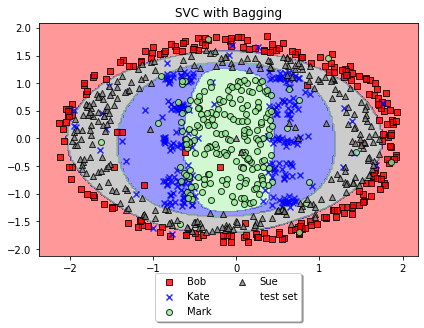

In [43]:
print("Best C parameters : " + str(best_C_Bag))
Plot_Result(best_bg, 'SVC with Bagging', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">4. GridSearch</font>
</div>

In [44]:
param_C = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=best_C)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('Accuracy : ' + str(gs.best_score_))
print('Parameters Details : ' + str(gs.best_params_))

C:\Users\ywleo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy : 0.8672086720867209
Parameters Details : {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}


C:\Users\ywleo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('\n[Nonlinear SVC: grid search]')
print('Test accuracy: %.2f' % clf.score(X_test_std, y_test))


[Nonlinear SVC: grid search]
Test accuracy: 0.85


Best parameters : {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}


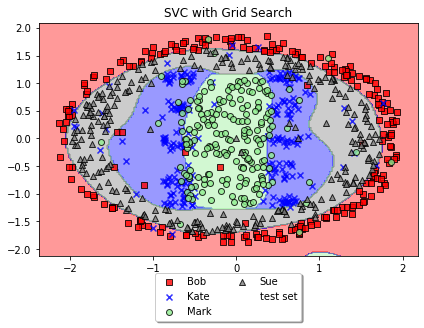

In [46]:
print("Best parameters : " + str(gs.best_params_))
Plot_Result(clf, 'SVC with Grid Search', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">5. Pipeline</font>
</div>

In [47]:
best_acc = -1
best_pipe = -1
best_C_pipe = -1

PipeCparams = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

for cp in PipeCparams:
    pipe_SVC = Pipeline([ ('scl', StandardScaler()), ('clf', SVC(kernel='rbf', random_state=0, gamma=0.2, C=cp)) ])
    
    pipe_SVC.fit(X_train_std, y_train)
    y_pred = pipe_SVC.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    
    print('[%d estimators SVC with Pipeline]' %cp)
    print('Accuracy: %.4f' % acc)
    
    if acc > best_acc:
        best_C_pipe, best_acc, best_pipe = cp, acc, pipe_SVC
        

[0 estimators SVC with Pipeline]
Accuracy: 0.4811
[1 estimators SVC with Pipeline]
Accuracy: 0.7081
[10 estimators SVC with Pipeline]
Accuracy: 0.8324
[100 estimators SVC with Pipeline]
Accuracy: 0.8270
[1000 estimators SVC with Pipeline]
Accuracy: 0.8270
[10000 estimators SVC with Pipeline]
Accuracy: 0.8108


Best C parameters : 10.0


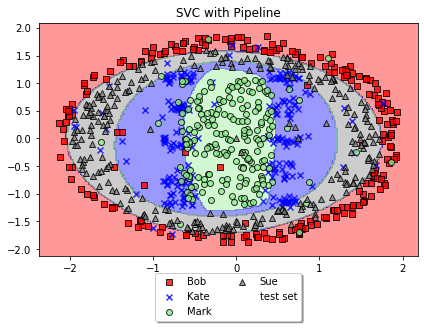

In [48]:
print("Best C parameters : " + str(best_C_pipe))
Plot_Result(best_pipe, 'SVC with Pipeline', X_train_std, X_test_std)

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">6. Pipeline with Grid Search</font>
</div>

In [49]:
pipe_SVM = Pipeline([ ('scl', StandardScaler()), ('clf', SVC(kernel='rbf', random_state=0, gamma=0.2, C=best_C_pipe)) ])

param_gamma = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_C = [0.1, 1.0, 10.0, 100.0]

# here you can set parameter for different steps 
# by adding two underlines (__) between step name and parameter name
param_grid = [{'clf__C': param_C, 
               'clf__kernel': ['linear']},
              {'clf__C': param_C, 
               'clf__gamma': param_gamma, 
               'clf__kernel': ['rbf']}]

# set pipe_svm as the estimator
gs = GridSearchCV(
    estimator = pipe_SVM, 
    param_grid = param_grid, 
    scoring = "accuracy",
    cv = 3
)

gs = gs.fit(X_train, y_train)
print('[SVC pipeline: grid search]')
print('Validation accuracy: %.3f' % gs.best_score_)
print(gs.best_params_)

[SVC pipeline: grid search]
Validation accuracy: 0.867
{'clf__C': 100.0, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'}


C:\Users\ywleo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.849


Best parameters : {'clf__C': 100.0, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'}


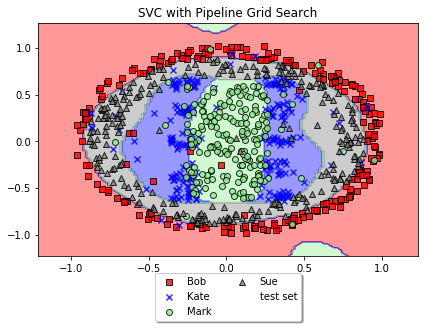

In [51]:
print("Best parameters : " + str(gs.best_params_))
Plot_Result(clf, 'SVC with Pipeline Grid Search', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Summary</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">The table below shows the best accuracy of each method</font>
</div>

<font style="font-size:20px; font-family:Andale Mono,monospace;">BEST ACCURACY OF EACH METHOD</font>
<table style="float:left; width:100%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b></b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>Decision Tree</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>Random Forest</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>K-Nearest Neighbors Classifier</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>Support Vector Classifier</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Basic</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>80%(depth:100)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>82%(est:50)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>81%(ngh:1)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>84%(C:20.0)</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>K-Fort Cross Validation</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>80%(k:15)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>82%(k:50)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>81%(k:10)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>84%(k:50)</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Bagging</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>81%(depth:100)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>81%(est:10)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>79%(ngh:1)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>84%(C:50.0)</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Boosting</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>78%(depth:200)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>81%(est:10)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Gridsearch</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>85%(C:100.0, gamma:1)</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Pipeline</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>78%(depth:100)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>82%(est:50)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>81%(ngh:1)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>83%(C:10.0)</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>Pipeline with Gridsearch</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>&#128683;</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid; color:red;">
            <b>85%(C:100.0, gamma:1)</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Voting</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Based on the table above, the top three suitable method are chosen as the method in voting, they are Random Forest(pipeline), KNN(pipeline) and SVC(pipeline Gridsearch) </font>
</div>

In [52]:
pipe_Forest = Pipeline([['clf', RandomForestClassifier(criterion='entropy',
                                    n_estimators=50, 
                                    random_state=1,
                                    n_jobs=2)]])
pipe_KNN = Pipeline([ ('scl', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski'))])
pipe_SVM = Pipeline([ ('scl', StandardScaler()), ('clf', SVC(kernel='rbf', random_state=0, gamma=1, C=100.0, probability=True)) ])

In [53]:
clf_labels = ['Random Forest', 'KNN', 'SVC']
print('[Individual]')
for pipe, label in zip([pipe_Forest, pipe_KNN, pipe_SVM], clf_labels):
    scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, scoring='precision_macro')
    print('%s: %.3f (+/- %.3f)' % (label, scores.mean(), scores.std()))

[Individual]
Random Forest: 0.836 (+/- 0.031)
KNN: 0.822 (+/- 0.051)
SVC: 0.876 (+/- 0.044)


In [54]:
print('[Voting]')
best_vt, best_w, best_score = None, (), -1

for a, b, c in list(itertools.permutations(range(0,3))): # try some weight combination
    
    clf = VotingClassifier(estimators=[('Forest', pipe_Forest), ('KNN', pipe_KNN), ('SVM', pipe_SVM)], 
                           voting='soft', weights=[a,b,c])
    
    #cross_validate(clf, X_train, y_train, scoring='precision_macro', cv=10, return_train_score=True)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='precision_macro')
    
    print('%s: %.3f (+/- %.3f)' % ((a,b,c), scores.mean(), scores.std()))
    if best_score < scores.mean():
        best_vt, best_w, best_score = clf, (a, b, c), scores.mean()

print('\nBest %s: %.3f' % (best_w, best_score))

[Voting]
(0, 1, 2): 0.862 (+/- 0.037)
(0, 2, 1): 0.822 (+/- 0.051)
(1, 0, 2): 0.880 (+/- 0.037)
(1, 2, 0): 0.822 (+/- 0.051)
(2, 0, 1): 0.859 (+/- 0.032)
(2, 1, 0): 0.838 (+/- 0.045)

Best (1, 0, 2): 0.880


In [55]:
best_vt.fit(X_train, y_train)
y_pred = best_vt.predict_proba(X_test)[:, 1]

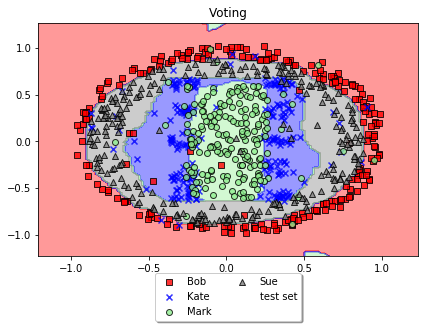

In [56]:
Plot_Result(best_vt, 'Voting', X_train, X_test)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Conclusion</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">In this case, the VOTING stated above is the model that achieved the best accuracy and its accuracy on testing data is 88%</font>
</div>